In [2]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE

from matplotlib.backends.backend_pdf import PdfPages

In [3]:
# Load all k-mer data files
def load_kmer_data():
    # Get the current working directory (where the notebook is running)
    notebook_dir = os.getcwd()
    
    # Construct the path to the data directory relative to the notebook
    data_path = os.path.abspath(os.path.join(notebook_dir, "..", "..", "data", "enhancer_identification"))

    # Check if the data directory exists
    if not os.path.isdir(data_path):
        raise FileNotFoundError(f"Data directory not found: {data_path}")
    
    # Find all relevant files in the data directory
    files = glob.glob(os.path.join(data_path, "*-mer_identification_train.txt"))
    
    data = {}
    for file in files:
        kmer_type = os.path.basename(file).split("_")[0]  # Extract k-mer type 
        k = int(kmer_type.split("-")[0])  # Extract k value from k-mer type 
        
        if 3 <= k <= 6:  # Only include k-mers from 3 to 6
            df = pd.read_csv(file, sep='\t', header=None, names=['sequence', 'label'])
            data[k] = df
    return data

# Convert sequences to feature vectors using k-mer counts
def vectorize_sequences(data):
    vectorizer = CountVectorizer(analyzer='char', ngram_range=(3, 6))  # Adjust n-gram range if needed
    feature_vectors = {}
    for kmer_type, df in data.items():
        X = vectorizer.fit_transform(df['sequence'])
        y = df['label']
        feature_vectors[kmer_type] = (X, y)
    return feature_vectors

In [4]:
# Load data
data = load_kmer_data()

# Vectorize sequences
feature_vectors = vectorize_sequences(data)

In [5]:
# # Perform t-SNE and plot results
# def plot_tsne(feature_vectors):
#     plt.figure(figsize=(20, 12))
    
#     for kmer_type in sorted(feature_vectors.keys()):
#         X, y = feature_vectors[kmer_type]
#         tsne = TSNE(n_components=2, random_state=42)
#         X_embedded = tsne.fit_transform(X.toarray())
        
#         # Separate enhancers and non-enhancers
#         enhancers = X_embedded[y == 1]
#         non_enhancers = X_embedded[y == 0]
        
#         # Plotting
#         plt.scatter(enhancers[:, 0], enhancers[:, 1], label=f"{kmer_type}-mer enhancers", alpha=0.5)
#         plt.scatter(non_enhancers[:, 0], non_enhancers[:, 1], label=f"{kmer_type}-mer non-enhancers", alpha=0.5)
    
#     plt.title("t-SNE Visualization of k-mer Sequences")
#     plt.xlabel("t-SNE Dimension 1")
#     plt.ylabel("t-SNE Dimension 2")
#     plt.legend(loc="upper right")
#     plt.show()


# # Plot t-SNE visualization
# plot_tsne(feature_vectors)

In [6]:
# # Perform t-SNE and plot results
# def plot_tsne(feature_vectors):
#     plt.figure(figsize=(20, 12))

#     # Define markers for each k-mer type
#     markers = ["o", "s", "D", "v", "^", "<", ">", "p", "*", "h", "H", "X", "d"]

#     # Sort feature_vectors by k-mer type (ascending order)
#     for idx, kmer_type in enumerate(sorted(feature_vectors.keys())):
#         X, y = feature_vectors[kmer_type]
#         tsne = TSNE(
#             n_components=2,
#             random_state=42,
#         )
#         X_embedded = tsne.fit_transform(X.toarray())

#         # Separate enhancers and non-enhancers by label
#         enhancers = X_embedded[np.array(y) == 1]
#         non_enhancers = X_embedded[np.array(y) == 0]

#         # Plotting
#         plt.scatter(enhancers[:, 0], enhancers[:, 1], label=f"{kmer_type} enhancers", alpha=0.25, color="red", marker=markers[idx % len(markers)])
#         plt.scatter(non_enhancers[:, 0], non_enhancers[:, 1], label=f"{kmer_type} non-enhancers", alpha=0.25, color="blue", marker=markers[idx % len(markers)])

#     plt.title("t-SNE Visualization of k-mer Sequences")
#     plt.xlabel("t-SNE Dimension 1")
#     plt.ylabel("t-SNE Dimension 2")
#     plt.legend(loc="upper right")
#     plt.show()

# # Plot t-SNE visualization
# plot_tsne(feature_vectors)

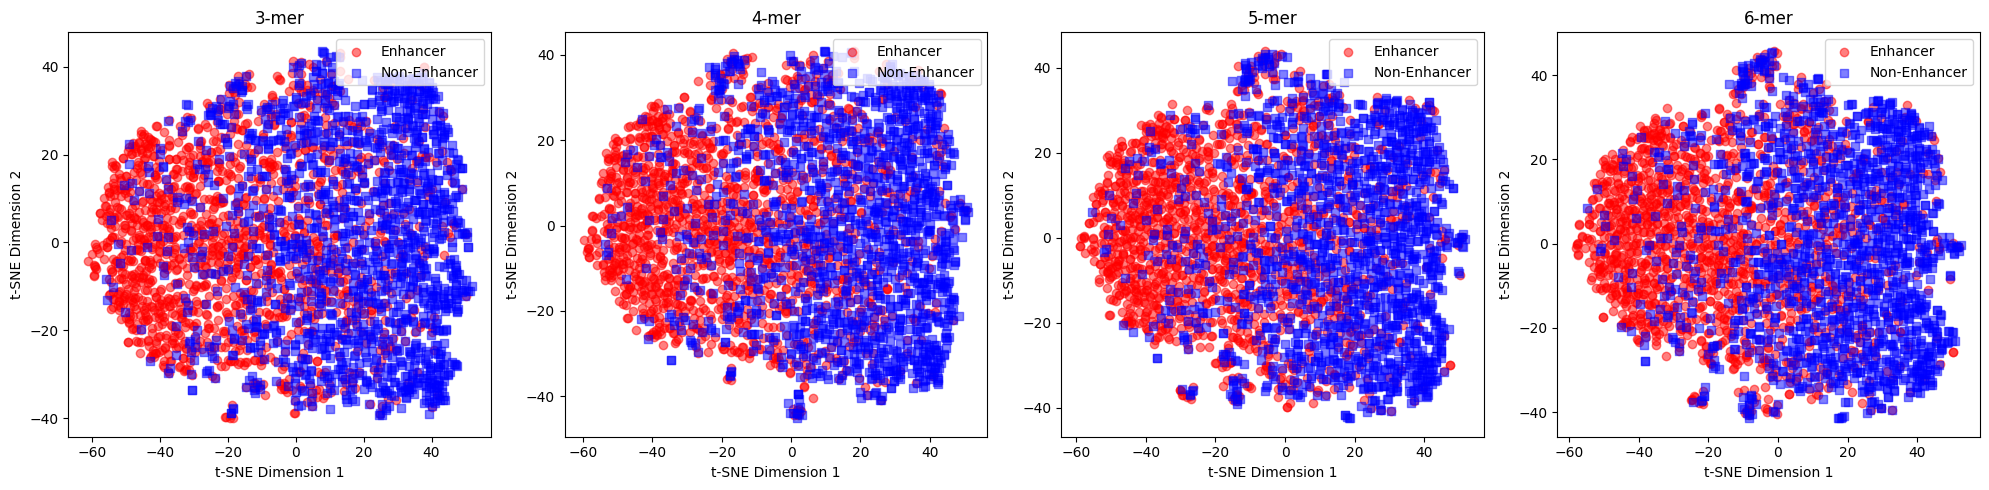

In [13]:
def plot_tsne_binary(X, y, ax, title):
    tsne = TSNE(
        n_components=2,
        random_state=42,
    )
    X_embedded = tsne.fit_transform(X.toarray())

    # Separate enhancers and non-enhancers by label
    enhancers = X_embedded[np.array(y) == 1]
    non_enhancers = X_embedded[np.array(y) == 0]

    # Plotting
    ax.scatter(enhancers[:, 0], enhancers[:, 1], label="Enhancer", alpha=0.5, color="red", marker="o")
    ax.scatter(non_enhancers[:, 0], non_enhancers[:, 1], label="Non-Enhancer", alpha=0.5, color="blue", marker="s")

    ax.set_title(title)
    ax.set_xlabel("t-SNE Dimension 1")
    ax.set_ylabel("t-SNE Dimension 2")
    ax.legend(loc="upper right")

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
axes = axes.ravel()

# Loop through feature_vectors[3] to [6]
for i, ax in zip(range(3, 7), axes):
    X, y = feature_vectors[i]
    plot_tsne_binary(X, y, ax, f"{i}-mer")

plt.tight_layout()

# Save plot to PDF
with PdfPages('tsne_visualizations.pdf') as pdf:
    pdf.savefig(fig)

plt.show()